# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 21, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

Run the following cell to import NumPy and Pyplot.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [17]:
def classical_gram_schmidt(A):
    """
    QR decomposition using classical Gram-Schmidt procedures. Loses orthogonality due to rounding error.
    Input: 
    A = m x n matrix that forms a basis (l.i. columns). m must be larger than n. Input is not changed.
    
    Returns:
    R = Upper triangular matrix
    Q = Orthogonal matrix 
    
    """
    # Get shape of matrix A
    m, n = np.shape(A)
    assert m >= n, "Matrix should have more or equal rows to columns"
    
    # Make empty QR matrixes in right form; R with 0 because we only fill in the rest of the squares
    # R is a square matrix; Q is m x n
    R = np.zeros((n, n))
    Q = np.array(A, dtype= 'float64')
    
    # Take the first column of A to be the first vector and normalize it to form an orthogonal basis
    # The top-left value for R is the norm of the first column of A

    Q[:, 0] = A[:, 0] / linalg.norm(A[:, 0])
    R[0, 0] = A[:, 0] @ Q[:, 0]
    
    # Loop over the rest of the columns
    for k in range(1, n):
        
        # Get the current column being transformed into an orthogonal vector
        a = A[:, k]
        
        # Set u as a
        u = a
    
        # Calculate u through the iterative process of multiplying previous u and a vectors
        for e_k in range(0, k-1):
        
            e_prev_k = Q[:, e_k]
          
            # Calculate the top row of R by taking the current a vector and multiplying it with previous e_ks
            R[e_k, k] = (a @ e_prev_k)
            
            # Calculate u
            u = u - ((a @ e_prev_k) * e_prev_k)
            
            # Check linear independence
            # TODO is dit nou essentieel of niet?
            assert not np.array_equal(u, np.zeros(u.shape)), "The column vectors are not linearly independent"
        
        # Normalize the u vector by the norm of u
        Q[:, k] = u / (linalg.norm(u) ) 
        
        # Get current R for this k
        R[k, k] = a @ Q[:, k]
             
        
    return Q, R

def modified_gram_schmidt(A):
    """
    QR decomposition using modified Gram-Schmidt procedures; superior numerically to classical Gram-Schmidt.
    Input: 
    A = m x n matrix that forms a basis (l.i. columns). m must be larger than n. Input is not changed.
    
    Returns:
    R = Upper triangular matrix
    Q = Orthogonal matrix 
    
    Taken from https://github.com/kajetanj/QR-MGS-decomp/blob/master/decompose.py
    """
    m, n = np.shape(A)
    assert m >= n, "Matrix should have more or equal rows to columns"
    

    Q = np.array(A, dtype='float64')
    R = np.zeros((n, n))
    
    for k in range(n):
        a_k = Q[:, k]
        R[k,k] = np.linalg.norm(a_k)
        a_k /= R[k, k]
        
        for i in range(k+1, n):
            # 
            a_i = Q[:, i]
            R[k,i] = np.transpose(a_k) @ a_i
            a_i -= R[k, i] * a_k

    return Q, R

matrix = np.array([
            [1.0, 1.0, -3.0],
            [3.0, 2.0, 1.0],
            [-2.0, 0.5, 2.5],
            [-8, -6, 2]
        ])
calc_q, calc_r = classical_gram_schmidt(matrix)
print(f"QR decomposition of the classical method is correct: {np.allclose(matrix, calc_q @ calc_r)}")
print("However, there is a loss of orthogonality; Qt @ Q should be identity matrix:\n", np.around(calc_q.T @ calc_q, 3))

mod_q, mod_r = modified_gram_schmidt(matrix)
print(f"QR decomposition of the classical method is correct: {np.allclose(matrix, mod_q @ mod_r)}" )
print("The loss of orthogonality seems to not be an issue for the modified method:\n", np.around(mod_q.T @ mod_q, 3))

QR decomposition of the classical method is correct: True
However, there is a loss of orthogonality; Qt @ Q should be identity matrix:
 [[ 1.     0.952 -0.   ]
 [ 0.952  1.     0.114]
 [-0.     0.114  1.   ]]
QR decomposition of the classical method is correct: True
The loss of orthogonality seems to not be an issue for the modified method:
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



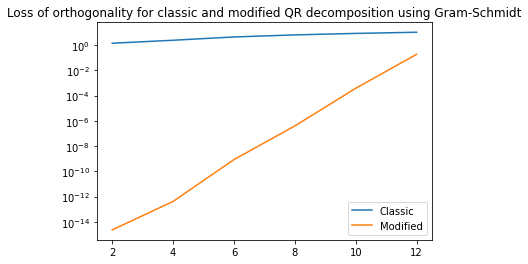

In [13]:
n_options = np.arange(2, 14, 2)
classical_losses = []
modified_losses = []

for n in n_options:
    matrix = linalg.hilbert(n)
    
    Q_classical = classical_gram_schmidt(matrix)[0]
    c_loss = np.linalg.norm(np.identity(n) - (Q_classical.T @ Q_classical))
    classical_losses.append(c_loss)
    
    Q_modified = modified_gram_schmidt(matrix)[0]
    m_loss = np.linalg.norm(np.identity(n) - (Q_modified.T @ Q_modified))
    modified_losses.append(m_loss)
    
    
plt.semilogy(n_options, classical_losses, label = "Classic")
plt.semilogy(n_options, modified_losses, label = "Modified")
plt.legend()
plt.title("Loss of orthogonality for classic and modified QR decomposition using Gram-Schmidt")
plt.show()

The classical Gram-Schmidt algorithm is not ideal for numerical calculations since it is known to be unstable.

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


In [ ]:
# Ik weet dat de code hieronder lelijk is, ik ga het nog fixen, maar voor nu vind ik het gek dat dit blijkbaar op precies
# dezelfde lijn uitkomt; weet niet of dat de bedoeling is.

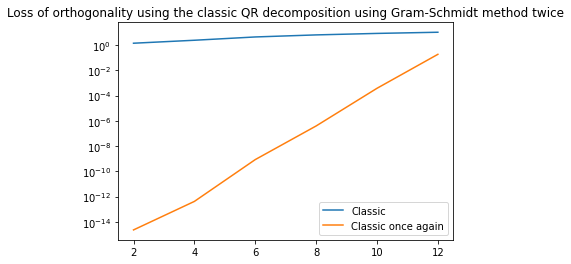

In [14]:
n_options = np.arange(2, 14, 2)
classical_losses = []
classical2_losses = []

for n in n_options:
    matrix = linalg.hilbert(n)
    
    Q_classical = classical_gram_schmidt(matrix)[0]
    c_loss = np.linalg.norm(np.identity(n) - (Q_classical.T @ Q_classical))
    classical_losses.append(c_loss)
    
    Q_classical2 = classical_gram_schmidt(matrix)[0]
    c_loss2 = np.linalg.norm(np.identity(n) - (Q_classical2.T @ Q_classical2))
    classical2_losses.append(c_loss2)
    
    
plt.semilogy(n_options, classical_losses, label = "Classic")
plt.semilogy(n_options, modified_losses, label = "Classic once again")
plt.legend()
plt.title("Loss of orthogonality using the classic QR decomposition using Gram-Schmidt method twice")
plt.show()

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [416]:
#Werkt nog niet


def get_norm(x):
    return np.sqrt(np.sum(np.square(x)))


def sign(x):
    if x<0:
        return -1
    else: 
        return 1
    
    
def householder_qr(A):
    # Implementation of algorithm 3.1 of Scientific Computing, an introduction (p 124)
    R = A.copy()
    m, n = (R.shape)
    I = np.identity(m)
    
    for k in range(0, min(n, m-1)):
        alpha_k = - sign(A[k,k]) * get_norm(A[k:, k])
        e_k = I[:, k]
        v_k = np.transpose(np.append(np.zeros(k), R[k:m,k]) - alpha_k * e_k)
        print(v_k)
        
        beta_k = np.dot(np.transpose(v_k), v_k)
        
        if beta_k != 0:
            for j in range(k, n):
                gamma_j = np.dot(np.transpose(v_k), R[:,j])
                R[:,j] = R[:,j] - np.transpose((2*gamma_j / beta_k) * v_k)
                
        print(R)
    
    print("end")
    print(R)     

In [419]:
A = np.matrix([[1,1,0],[1,0,1],[0,1,1]])
householder_qr(A)

[2.41421356 1.         0.        ]
[[-1  0  0]
 [ 0  0  0]
 [ 0  1  1]]
[0. 1. 1.]
[[-1  0  0]
 [ 0 -1 -1]
 [ 0  0  0]]
end
[[-1  0  0]
 [ 0 -1 -1]
 [ 0  0  0]]


## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


In [ ]:
# YOUR CODE HERE